In [22]:
import pandas as pd
import folium
import json
from folium import plugins

# Background
As COVID-19 continues to spread across the world, one of the greatest challenges to response efforts is a lack of data and evidence about infection and mortality rates. We will learn more about the virus and the  populations most at risk as more test kits arrive in the hands of physicians and the total number of cases becomes clearer. Ideally, this information will be used to help target response efforts, guide policy decisions, inform the donor community, and support decision-making by businesses and multinational organizations whose work spans multiple countries. As a global development company with staff in over ___ countries, this kind of information is invaluable, as we think about ways to support our staff, and prepare for what comes next.

Information from the earliest confirmed cases of COVID-19 indicates that some groups of people are at a higher risk for infection than others. Public health organizations like the WHO and US CDC have released warnings for those at higher risk to take extra precautionary measures. To help DAI and other global development organizations better understand vulnerabilities in the communities in which they work, the DAI Global Health and the Center for Digital Acceleration are tracking these risk factors, in addition to other potential correlates to mortality rates. 

In this first of a multi-part series, we will keep an updated record of demographic, socio-economic, and environmental factors that are perceived to being correlated with heightened risk of mortality and identify known country and subnational datasets that can help us identify countries at risk. We will also provide charts and maps to identify potential country level “hotspots.” 


# Theories

### (THIS SECTION WILL BE UPDATED AS WE LEARN MORE ABOUT RISK FACTORS)

Below is a list of factors that have emerged as known drivers of increasing risk of mortality. Some of these theories are based on information released by official public health bodies while others are factors that could be proxies. As we learn more about possible drivers from the medical community, we will update this analysis with new datasets when possible.
1.	People over the age of 65+ are at higher risk (CDC)
2.	People who smoke are at higher risk (CDC)
3.	People who have serious chronic medical conditions are at higher risk (CDC). These conditions include:
a.	Heart disease
b.	Diabetes
c.	Lung disease
4.	People who have hypertension are at higher risk (Bloomberg News)
5.	People who work in industry are at higher risk
6.	People living in countries with higher air pollution are at higher risk
7.	People living in countries with higher inward Foreign Direct Investment are at higher risk
8.	People living in countries with lower preparedness scores are at higher risk
9.	People living in countries with lower Global Health Security Index scores are at higher risk
10.	Temperature is correlated with COVID-19 mortality


In [24]:
factor_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9Puqir6LrosixgUrjvXW09b58RzIsMOIdU1AmTqdTPM-Uki2nma39SGSN9ZzkqVQid8m6DT7nSHvq/pub?gid=0&single=true&output=csv')
factor_df.head()

,NAME_ENGLI,ID_0,ISO3,Population (2018),Covid_Infections,Covid_Deaths,pop_over_65,Air Pollution,CCKP Projected Median Temperatures for Jan 2020 (2012),Percent Asthmatic (2017),...,Total Trade (Exp + Imp) (2017),Total Trade w China (2017),Total Trade w Italy (2017),Total Trade w S Korea (2017),Total Trade w USA(2017),Percent of Country Trade with China (2017),Percent of Country Trade with Italy (2017),Percent of Country Trade with S Korea (2017),Percent of Country Trade with USA (2017),Trade to GDP (2017)
0,Aruba,14,ABW,105845.0,NaN,NaN,13.550950,NaN,25.28,NaN,...,2.220000e+09,2.430570e+07,6152849.0,30701627.0,1.000000e+09,0.01090,0.00277,0.01380,0.4490,146.04880
1,Afghanistan,1,AFG,37172386.0,NaN,NaN,2.584927,56.91081,-1.72,NaN,...,1.180000e+10,5.440000e+08,20371697.0,74924840.0,9.550000e+08,0.04630,0.00173,0.00637,0.0813,51.23688
2,Angola,8,AGO,30809762.0,NaN,NaN,2.216374,32.38850,23.52,NaN,...,4.620000e+10,2.190000e+10,689000000.0,527000000.0,3.360000e+09,0.47399,0.01490,0.01140,0.0727,52.25682
3,Anguilla,9,AIA,30809762.0,NaN,NaN,2.216374,32.38850,24.92,NaN,...,1.050000e+08,NaN,311804.0,113935.0,6.378128e+07,NaN,0.00297,0.00109,0.6080,NaN
4,Ã…land,3,ALA,30809762.0,NaN,NaN,2.216374,32.38850,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# read in covid data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-16-2020.csv'
covid_df = pd.read_csv(url)

# Mapping

In [27]:
# load world geojson file
with open('countries.geojson') as f:
    world_area = json.load(f)

In [28]:
# function to create choropleth map with COVID case overlay
def create_map(factor_df, covid_df, variable_name, world_area):
    # initialize the map
    world_map = folium.Map(tiles='Mapbox Bright')
    
    # add choropleth base
    folium.Choropleth(
        geo_data=world_area,
        name=variable_name,
        data=factor_df,
        columns=['ISO3', variable_name],
        key_on='feature.properties.ISO_A3',
        fill_color='BuPu',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_opacity=0,
        legend_name=variable_name).add_to(world_map)
    
    # add covid data - confirmed cases only
    #for i,row in covid_df.iterrows():
    #    if row.Confirmed != 0:
    #        tooltip = 'Country/Region: ' + row['Country/Region'] + '<br>' + 'Province/State: ' + str(row['Province/State'])+ '<br>' + 'Confirmed Cases: ' + str(row.Confirmed)
    #        folium.CircleMarker((row.Latitude,row.Longitude), radius=row.Confirmed/1000, color='red', fill_color='red', fill_opacity=.5, tooltip=tooltip).add_to(world_map)
    #folium.LayerControl().add_to(world_map)

    # save map as html for interactivity
    world_map.save(variable_name+'.html')
    
    return None

In [16]:
for x in factor_df.columns[6:7]:
    create_map(factor_df, covid_df, x, world_area)

# Charting


In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
plt.style.use('ggplot')

In [50]:
# function to create standard bar chart
def create_bar(factor_df, variable_name):
    # sort by value & drop nulls
    factor2_df = factor_df.dropna(subset=[variable_name]).sort_values(by=[variable_name]).tail(25)
    print(factor2_df)
    
    # plot
    plt.figure(figsize=(10,10))
    plt.barh(factor2_df['NAME_ENGLI'], factor2_df[variable_name], color='#a1c7e3')
    plt.title('Population, age 65+ (%)')
    
    # save as png
    plt.savefig(variable_name +'_bar.png')
    return None

               NAME_ENGLI  ID_0 ISO3  Population (2018)  Covid_Infections  \
41            Switzerland   223  CHE          8516543.0               NaN   
181           Puerto Rico   183  PRI          3195153.0               NaN   
18                Belgium    23  BEL         11422068.0               NaN   
15                Austria    16  AUT          8847037.0               NaN   
101               Hungary   103  HUN          9768785.0               NaN   
166           Netherlands   158  NLD         17231017.0               NaN   
242  Virgin Islands, U.S.   251  VIR           106977.0               NaN   
69                  Spain   215  ESP         46723749.0               NaN   
58         Czech Republic    62  CZE         10625695.0               NaN   
211              Slovenia   208  SVN          2067372.0               NaN   
70                Estonia    73  EST          1320884.0               NaN   
132             Lithuania   130  LTU          2789533.0               NaN   

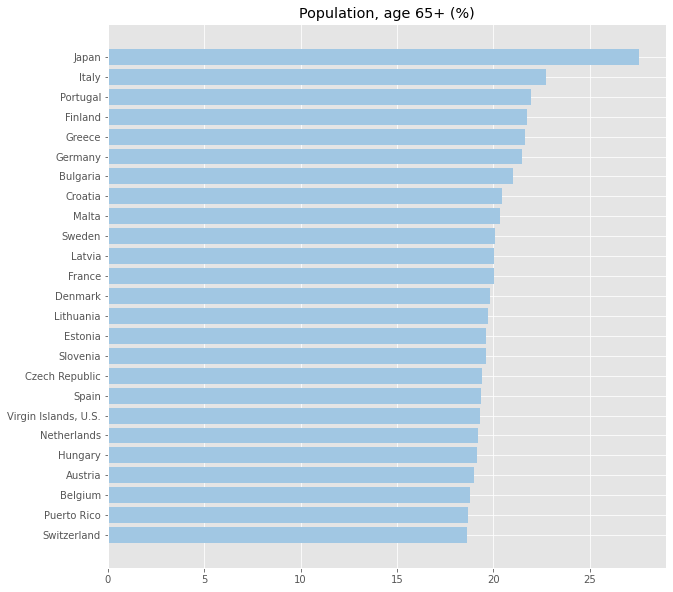

In [51]:
# loop through all variables and create bar charts
for x in factor_df.columns[6:7]:
    create_bar(factor_df, x)

c:\users\gfu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\gfu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


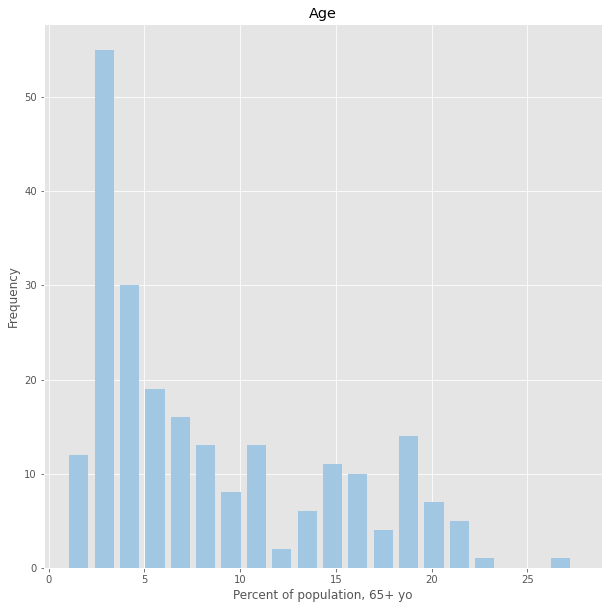

In [103]:
# histogram for factor 1
plt.figure(figsize=(10,10))
plt.hist(factor_df['pop_over_65'], bins=20, width=1, color='#a1c7e3')
plt.xlabel('Percent of population, 65+ yo')
plt.ylabel('Frequency')
plt.title('Age')
plt.savefig('pop_over_65_hist.png')

# Factor 1: Age
Age has been noted by all official public health organizations as a risk for getting very sick from COVID-19, specifically older adults. Data from the earliest cases in China, Italy, and South Korea have shown that mortality rates are significantly higher among older adults. Using data from the World Bank in 2018, we looked at the percentage of the population aged 65 years old and older in each country. The map below shows the global distribution of these older adults - the darker color indicates a larger percentage of the country population while the lighter indicates a smaller percentage.

In [17]:
from IPython.display import Image, IFrame
IFrame(src='pop_over_65.html', width=700, height=600)

Here we've ranked the top 25 countries by their population percentage of older adults. Japan tops the list at 27.6% while Italy ranks second in the world with over 22.8% of the country aged 65 years or older.

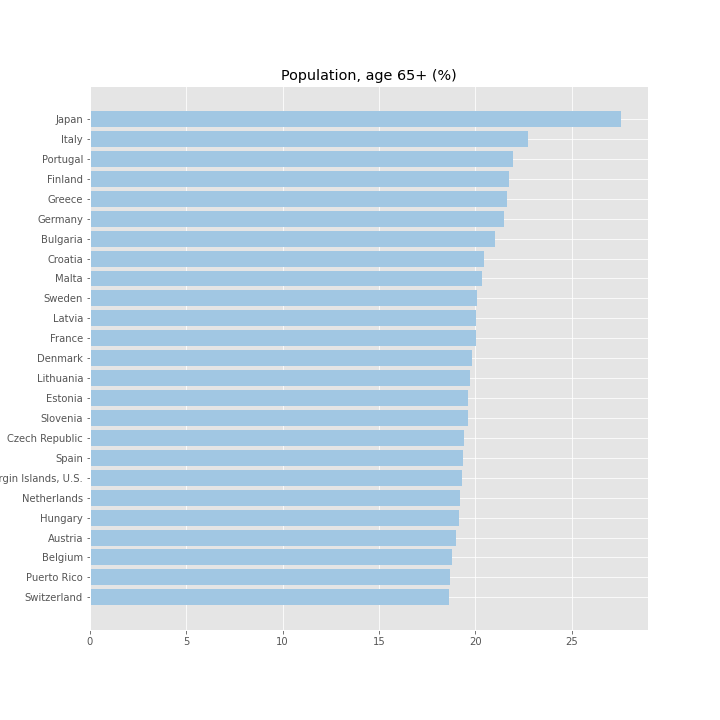

In [52]:
Image('pop_over_65_bar.png')

Finally, we looked at the distribution of countries. Most countries have an older population that makes up between 0-13% of the entire country population. However, there is also a smaller group of countries with a slightly higher percentage of older adults - indicated by the second peak in the graph - ranging between 15-20% of the country population.

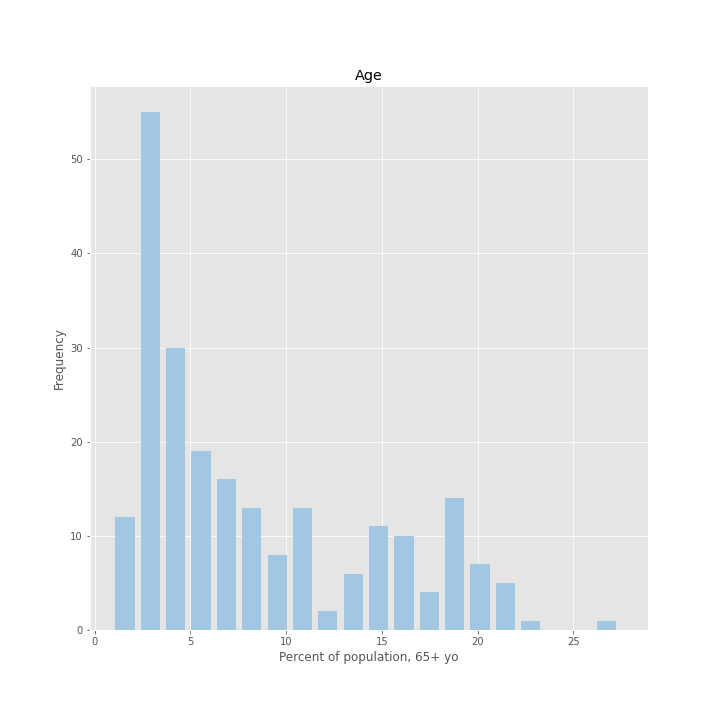

In [5]:
Image('pop_over_65_hist.png')